# Exploring the Indian Startup Ecosystem: Data Analysis and Strategic Insights

In this project, our team dives into the world of Indian startups. Using data analysis, we will explore funding trends, regional disparities, and investor behavior and preferences. We aim to find what is working, what is not, and where the opportunities lie. The insights we gain will help guide our strategy as we venture into the Indian startup ecosystem, making informed decisions in this dynamic market.


#NULL HYPOTHESIS: There has been no significant increase in the amounts of funding received by Indian startups between 2018 and 2021


#ALTERNATIVE HYPOTHESIS: The amounts of funding received by Indian startups have increased significantly between 2018 to 2021.

 

Analytical Questions:
1. What top 10 sectors have received the highest amount of funding?
2. What top 10 sectors have received lowest amounts of funding?
3. What is the average amount of funding a startup can receive in the Indian ecosystem?
4. Which funding stages tend to receive the highest amount of funding?
5. Which Regions(Location of headquarters) in India have the highest concentration of successfully funded startups?
6. What is the overall trend in funding for Indian startups over the past years?
7. Are there specific sectors that attract funding at particular stages?



In [1694]:
#install required libraries
%pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [1695]:
#install required libraries
%pip install python-dotenv


Note: you may need to restart the kernel to use updated packages.


In [1696]:
#import necesssary modules
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [1697]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#code for connection 
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [1698]:
# Use the connect method of the pyodbc library and pass in the connection string

connection = pyodbc.connect(connection_string)

# Getting the data

In [1699]:
#write query statement to get dateset

query = "Select * from dbo.LP1_startup_funding2020"
data = pd.read_sql(query, connection)
 
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,None


In [1700]:
#get data shape
data.shape


(1055, 10)

In [1701]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [1702]:
#load second dataset

query2 = "Select * from dbo.LP1_startup_funding2021"
data1 = pd.read_sql(query2, connection)
 
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [1703]:
data1.shape

(1209, 9)

In [1704]:
#load  third dataset
data2 = pd.read_csv('startup_funding2019.csv')
data2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [1705]:
#load fourth dataset

data3 = pd.read_csv('startup_funding2018.csv')
data3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


# Data Cleaning and EDA


Duplicates are dropped to ensure the uniqueness of the data

In [1706]:
#drop duplicates in first dataset if any

data = data.drop_duplicates()
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,None


In [1707]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount         799 non-null    float64
 8   Stage          590 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 90.4+ KB


In [1708]:
#convert amount datatype to string for now in order to concatenate with other datasets
data['Amount'] = data['Amount'].astype(str)

Unecessary columns are dropped to improve data quality by ensuring that only relevant data is used

In [1709]:
#drop unnecesary columns ('column10)

data = data.drop(columns='column10')
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


A new column which shows the year the funding was received is added in order to enable time series analysis when the data sets are concatenated into one 

In [1710]:
#create a new column called Year Funded and fill with 2020

value_to_fill = 2020
data['Year Funded'] = value_to_fill
data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [1711]:
#get data1 info
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [1712]:
#Get data shape to know number of rows and columns

data1.shape

(1209, 9)

In [1713]:
#drop duplicates if any for the second dataset to ensure uniqueness of dataset

data1 = data1.drop_duplicates()
data1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [1714]:
#create a new column called Year Funded and fill with 2021

value_to_fill1 = 2021
data1['Year Funded'] = value_to_fill1
data1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


similar datasets are concatenated to make analysis easy and effective

In [1715]:
#concat first and second dataset 

df = pd.concat([data, data1])
df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [1716]:
# get data info to be sure of what we are working with

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2242 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2242 non-null   object 
 1   Founded        2028 non-null   float64
 2   HeadQuarter    2147 non-null   object 
 3   Sector         2229 non-null   object 
 4   What_it_does   2242 non-null   object 
 5   Founders       2226 non-null   object 
 6   Investor       2143 non-null   object 
 7   Amount         2239 non-null   object 
 8   Stage          1359 non-null   object 
 9   Year Funded    2242 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 192.7+ KB


In [1717]:
df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [1718]:
pd.set_option('display.max_rows', 10)

Amount column is converted to a numeric value to enable aggregations. Errors are coerced to NaN to prevent code errors

In [1719]:
# Convert 'Amount' column to numeric, coercing errors to NaN

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [1720]:
#get data head to preview the dataframe

df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [1721]:
# Set the display options to show float values without scientific notation. This removes the decimal notation from the year values

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [1722]:
# Rename the column from 'Amount' to 'Amount($)'

df.rename(columns={'Amount': 'Amount($)'}, inplace=True)

In [1723]:
df.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [1724]:
# Rename the column from 'What_it_does' to 'What it does'

df.rename(columns={'What_it_does': 'What it does'}, inplace=True)

In [1725]:
# Rename the column from 'Company_Brand' to 'Company Brand'

df.rename(columns={'Company_Brand': 'Company Brand'}, inplace=True)

In [1726]:
df.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


In [1727]:
#get a view of the third dataset

data2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [1728]:
#create a new column called Year Funded and fill with 2019

value_to_fill2 = 2019
data2['Year Funded'] = value_to_fill2
data2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [1729]:
# Remove currency symbols from data2 to enable aggregations
data2['Amount($)'] = data2['Amount($)'].str.replace('$', '')
data2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","50,000,000",NaN,2019


In [1730]:
# Rename the column from 'Company/Brand' to 'Company Brand'

data2.rename(columns={'Company/Brand': 'Company Brand'}, inplace=True)

In [1731]:
data2.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN,2019
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D,2019
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN,2019


In [1732]:
#Concatenate df with third dataset

df1 = pd.concat([df, data2])
df1


,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","20,000,000",Series A,2019
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","693,000,000",NaN,2019
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"5,000,000",Series B,2019
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","50,000,000",NaN,2019


We check for the number of null values to know what we are dealing with

In [1733]:
#Check for number of null values

df1.isnull().sum()

Company Brand       0
Founded           243
HeadQuarter       114
Sector             18
What it does        0
Founders           19
Investor           99
Amount($)        1443
Stage             929
Year Funded         0
dtype: int64

In [1734]:
#check for unique values for each column

df1.nunique()

Company Brand    1797
Founded            34
HeadQuarter       123
Sector            502
What it does     2186
Founders         1980
Investor         1777
Amount($)         350
Stage              62
Year Funded         3
dtype: int64

In [1735]:
data3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


The aim is to make the last dataset (startup_funding2018) look like the other datasets in terms of structure so that concatenation will be done

In [1736]:
#the location is split and only the first city is maintained in order to make it look like the other datasets

data3['Location'] = data3['Location'].str.split(', ').str[0]
data3

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [1737]:
# Get information about the dataset, including data types and missing values
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Amount values for the fourth dataset is converted from Rupees to dollars to ensure consistency and validity of dataset

In [1738]:
def extract_currency(amount):
    if pd.notna(amount):  # Check if the value is not NaN
        currencies = ['₹', '$']
        amount_str = str(amount)  # Convert to string to handle float values

        for currency in currencies:
            if currency in amount_str:
                return currency

    return None

# Applying the function to the 'Amount' column
data3['Currency'] = data3['Amount'].apply(extract_currency)

data3


,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...,None
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",None
522,Happyeasygo Group,"Tourism, Travel",Series A,—,Haryana,HappyEasyGo is an online travel domain.,None
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,None
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...,₹


In [1739]:
# Define exchange rate for Rupees to Dollars (The average INR/USD exchange rate for 2018 is 0.01461 US Dollars per Indian Rupee.)

rupees_to_dollars_rate = 0.01461

In [1740]:
# Convert to numeric, considering currency
data3['Amount'] = pd.to_numeric(data3['Amount'].replace('[\\₹,$]', '', regex=True), errors='coerce')

# Perform the currency conversion
data3['Amount'] = data3['Amount'] * rupees_to_dollars_rate 

data3




,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India,₹
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,None
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,3287250,Bangalore,"Udaan is a B2B trade platform, designed specif...",None
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,None
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,110,Mumbai,Mombay is a unique opportunity for housewives ...,None
524,Droni Tech,Information Technology,Seed,511350,Mumbai,Droni Tech manufacture UAVs and develop softwa...,₹


Certain columns are renamed to ensure that data3's structure is similar to df1 in order for concatenation to be done

In [1741]:
#change column name from 'Company Name' to 'Company Brand' 
data3.rename(columns={'Company Name': 'Company Brand'}, inplace=True)

#Change column name from 'Location' to 'HeadQuarter
data3.rename(columns={'Location': 'HeadQuarter'}, inplace=True)

#Change column name from ' Round/Series' to 'Stage'
data3.rename(columns={'Round/Series': 'Stage'}, inplace=True)

#Change column name from 'About Company' to 'What it does'
data3.rename(columns={'About Company': 'What it does'}, inplace=True)

#Change column name from ' Industry' to 'Sector'
data3.rename(columns={ 'Industry': 'Sector'}, inplace=True)

# Add dollar sign($) to 'Amount' column
data3.rename(columns={'Amount' : 'Amount($)'}, inplace=True)


In [1742]:
data3.head()

,Company Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Currency
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India,₹
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,None


In [1743]:
# Drop Currency column since it is of no use

data3 = data3.drop(columns = 'Currency')
data3

,Company Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,3287250,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,110,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,511350,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [1744]:
#create a new column called Year Funded and fill with 2018

value_to_fill1 = 2018
data3['Year Funded'] = value_to_fill1
data3

,Company Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Year Funded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,3652,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584400,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949650,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,29220,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,3287250,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,110,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511350,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [1745]:
# check for unique values
data3.nunique()

Company Brand    525
Sector           405
Stage             21
Amount($)        158
HeadQuarter       50
What it does     524
Year Funded        1
dtype: int64

In [1746]:
#concatenate the last dataset with the df1

data_final= pd.concat([df1 , data3])

data_final

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaN,Bangalore,"B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,3287250,Series C,2018
522,Happyeasygo Group,NaN,Haryana,"Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018
523,Mombay,NaN,Mumbai,"Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,110,Seed,2018
524,Droni Tech,NaN,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511350,Seed,2018


Sector column is dealt with to make the dataset more concise and easy to work with. To do this, a function is created and the re module is used to search for specific keywords for a particular sector.

In [1747]:
#get unique values from sector column
data_final['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [1748]:

data_final['Sector'].value_counts()

Sector
FinTech                                       172
EdTech                                        141
Fintech                                        85
Financial Services                             75
Edtech                                         74
                                             ... 
Merchandise                                     1
Facilities Services                             1
D2C Business                                    1
NFT Marketplace                                 1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 873, dtype: int64

In [1749]:
# set values to lowercase to improve consistency

data_final['Sector'] = data_final['Sector'].str.lower()

# Remove leading and trailing whitespaces from the sector names to rectify variations caused by extra spaces
data_final['Sector'] = data_final['Sector'].str.strip()

In [1750]:
data_final['Sector'].value_counts()

Sector
fintech                                       257
edtech                                        215
financial services                             75
e-commerce                                     75
healthcare                                     67
                                             ... 
aviation                                        1
it company                                      1
environmental service                           1
job discovery platform                          1
biotechnology, health care, pharmaceutical      1
Name: count, Length: 835, dtype: int64

In [1751]:
# split Sector into list and keep first item of the sector name
data_final['Sector'] = data_final['Sector'].str.split(',').str[0]

In [1752]:
data_final['Sector'].nunique()

554

In [1753]:
# Replace '-' in the sector column with NaN since that entry cannot be defined.
data_final['Sector'] = data_final['Sector'].replace('—', np.nan)

In [1754]:
data_final['Sector'].isnull().sum()

48

In [1755]:
# Calculate the mode of the 'Sector' column
mode_sector = data_final['Sector'].mode()[0]

# Fill missing values with the mode
data_final['Sector'].fillna(mode_sector, inplace=True)


In [1756]:
import re

# Convert some sector names to more brief ones
data_final['Sector'] = data_final['Sector'].str.lower()
data_final['Sector'] = data_final['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
data_final['Sector'] = data_final['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
data_final['Sector'] = data_final['Sector'].apply(lambda x: 'tech' if x == 'it' else x)

# Remove leading, trailing, and extra whitespaces from the 'Sector' column
data_final['Sector'] = data_final['Sector'].str.replace('\s+', ' ', regex=True).str.strip()

# Regex grouping function for sector redistribution
def sector_redistribution(sector):
    if isinstance(sector, float):
        sector = str(sector)
    
    # Agriculture
    if re.fullmatch(r'agriculture|farming|farmers|agriculture|dairy startup', sector, flags=re.IGNORECASE):
        return 'Agriculture'

    
    # Automobile
    elif re.fullmatch(r'automotive|air transport|transport|logistics|transportation|vehicle|'
                    r'aviation|vehicles|tyre|fleet|wheels|aero|mobility|aerospace|wl & rac protection|'
                    r'micro-mobiity|delivery service|automobile & technology|wl & rac protection|'
                    r'automotive|micro-mobiity|transport|mobility|delivery service|aviation|aerospace|vehicle repair startup', sector, flags=re.IGNORECASE):
        return 'Automobile'


    # Beauty & Fashion
    elif re.fullmatch(r'beauty|cosmetic|fashion|skincare|wear|cosmetics|eyewear|textiles|cloth|jewellery|eyeglasses|'
                    r'cosmetics|apparel & fashion|ar startup|fashion|eyeglasses|jewellery|beauty|eyewear|'
                    r'textiles|beauty & wellness|beauty products|clothing|d2c fashion|d2c jewellery|eye wear|'
                    r'fashion & lifestyle|fashion and lifestyle|fashion startup|fashion tech|foootwear|'
                    r'jewellery startup|skincare startup', sector, flags=re.IGNORECASE):
        return 'Beauty & Fashion'

    
    # Business Intelligence
    elif re.fullmatch(r'analytics|consulting|human|career|\berp\b|advertising|advertisement|market research|'
                    r'entrepre|recruit|\bhr\b|sultancy|advisory|work|job|management|skill|legal|'
                    r'crm|specific domain to individuals|information services|ai & data science|ai & tech|hr|'
                    r'legal|consulting|crm|advertisement|analytics|information services|market research|'
                    r'advertising|big data|business intelligence|data analytics|data intelligence|data science|'
                    r'environmental consulting|innovation management|location analytics|virtual auditing startup',
                    sector, flags=re.IGNORECASE):
        return 'Business Intelligence'


    # Commerce
    elif re.fullmatch(r'marketing company|retail startup|trading platform|sles and marketing|reatil startup|'
                    r'consumer goods|warehouse|customer service company|marketing startup|social commerce|social e commerce|'
                    r'ecommerce|b2b marketplace|b2b|marketplace|retail aggregator|e-store|e market|e-tail|sales and services|'
                    r'estore|marketing|taxation|b2b ecommerce|b2b service|capital markets|business supplies and equipment|'
                    r'sales and distribution|b2b startup|ecommerce and ar|e-marketplace|marketing and customer loyalty|'
                    r'shopping|retail|e store|commercial|merchandise|d2c|consumer services|e-market|social e-commerce|'
                    r'sales & services|estore|content commerce|wholesale|Commerce|e-commerce|e-commerce & ar|'
                    r'e-commerce platforms|entreprenurship|furniture rental|management consulting|martech|nft marketplace|'
                    r'retail tech|supply chain|translation & localization|appliance|automotive and rentals|'
                    r'sles and marketing|reatil startup|consumer goods|warehouse|customer service company|'
                    r'marketing startup|social commerce|social e-commerce|ecommerce|b2b marketplace|b2b|'
                    r'marketplace|retail aggregator|e-store|e market|e-tail|sales & services|estore|marketing|'
                    r'taxation|b2b service|wholesale|consumer services|capital markets|b2b ecommerce|content commerce|'
                    r'd2c|merchandise|commerce|sales and distribution|b2b startup|e-marketplace|commercial|b2b agritech|'
                    r'b2b e-commerce|b2b supply chain|b2b travel|bike marketplace|bike rental|business consumer|'
                    r'business development|business supplies & equipment|business travel|classifieds|consultancy|'
                    r'consumer service|content marketplace|content marktplace|customer service|d2c business|d2c startup|'
                    r'e-commerce & ar|e-commerce platforms|entreprenurship|furniture rental|management consulting|martech|'
                    r'nft marketplace|retail tech|supply chain|translation & localization|agritech/commerce|'
                    r'marketing & advertising|marketing & advertising|marketing & advertising|marketing & customer loyalty', sector, flags=re.IGNORECASE):
        return 'Commerce'


    
    # Education
    elif re.fullmatch(r'advisory firm|education|linguistic spiritual|robotics|life sciences|blockchain|machine learning|'
                    r'preschool daycare|e-learning|water purification|pollution control equipment|'
                    r'higher education|career planning|continuing education|edtech|edtech startup|edttech|'
                    r'education management|skill development|', sector, flags=re.IGNORECASE):
        return 'Education'

    
    
    # Energy
    elif re.fullmatch(r'electricity|solar|clean energy|energy|oil & energy|oil and energy|renewable energy|'
                    r'renewable player|renewables & environment', sector, flags=re.IGNORECASE):
        return 'Energy'


    # Finance
    elif re.search(r'bank|fintech|finance|crypto|accounting|credit|venture|crowd|venture|fund|lending|financial'
                r'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortgage|financial services|'
                r'nft|payments|financial service|online financial service|investment|financial services|insurance|'
                r'crypto|nft|credit|banking|consumer lending|credit cards|crowdfunding|crowdsourcing|cryptocurrency|'
                r'digital mortgage|equity management|finance company|insurance tech|insurance technology|insuretech|'
                r'insurtech|investment banking|investment management|investment tech|mobile payments|mutual funds|'
                r'neo-banking|online credit management startup|venture capital|venture capital & private equity|'
                r'venture capitalist|virtual banking|wealth management', sector, flags=re.IGNORECASE):
        return 'Finance'

    
    # Food & Beverages
    elif re.fullmatch(r'food industry|food and beverages|food delivery|fusion beverages|diary startup|food|beverage|'
                    r'nutrition sector|beverages|food startup|food & beverages|tea|snack food|restaurants|food processing|'
                    r'food diet|milk startup|tobacco|fishery|cannabis startup|food and nutrition|organic|organic food|'
                    r'wine and spirits|qsr startup|fmcg|dairy|craft beer|catering|food & bevarages|food & logistics|'
                    r'food & nutrition|food & tech|food and beverage|food devlivery|food production|food tech|foodtech|'
                    r'foodtech & logistics|nutrition tech|wine & spirits', sector, flags=re.IGNORECASE):
        return 'Food & Beverages'



    # Government
    elif re.fullmatch(r'sanitation solutions|multinational conglomerate company|pollution control equiptment|defense & space|defense tech|'
                    r'environmental service|environmental services|government|human resources|legal services|'
                    r'legal tech|legaltech|recruitment|recruitment startup|staffing & recruiting', sector, flags=re.IGNORECASE):
        return 'Government'

    
    # Health
    elif re.fullmatch(r'ai health|veterinary|healthcare|mental health|nutrition|pharma|hospital|health care|heathcare|medical|'
                    r'medical device|health diagnostics|alternative medicine|dental|elder care|home health|personal health|'
                    r'child care|helathcare|health diagnosis|ayurveda tech|biopharma|dietary supplements|fertility tech|'
                    r'healtcare|health|health & wellness|health and fitness|health insurance|healthcare/edtech|healthtech|'
                    r'heathtech|hospital & health care|hygiene|hygiene management|pharmaceutical|pharmacy|primary business is development and manufacturing of novel healthcare products in effervescent forms using imported propriety ingredients.|veterinary'
                    r'primary business is development and manufacturing of novel healthcare products in effervescent forms using imported propriety ingredients', sector, flags=re.IGNORECASE):
        return 'Health'

    
    # Lifestyle
    elif re.fullmatch(r'arts & crafts|audio|travel|fitness|dating|podcast|personal care|tourism|design|wellness|training|'
                    r'wedding|biomaterial startup|children|cooking|cultural|events|fitness startup|home decor|home design|'
                    r'hospitality|interior & decor|interior design|lifestyle|matrimony|personal care startup|pet care|'
                    r'professional training & coaching|spiritual|tourism & ev|work fulfillment|yoga & wellness', sector, flags=re.IGNORECASE):
        return 'Lifestyle'

    
    # Manufacturing
    elif re.fullmatch(r'automobile|automobiles|automotive company|manufacturing|automation|construction|'
                    r'battery manufacturer|industrial automation|furniture|consumer electronics|'
                    r'manufacturing startup|industrial|b2b manufacturing|battery|battery design|'
                    r'mechanical & industrial engineering|mechanical or industrial engineering|'
                    r'packaging services|packaging solution startup|tyre management', sector, flags=re.IGNORECASE):
        return 'Manufacturing'


    # Media & Entertainment
    elif re.fullmatch(r'ad-tech|video sharing platform|video streaming platform|digital media|entertainment|'
                    r'social media|video personalization|visual media|video communication|music|online media|'
                    r'content publishing|celebrity engagement|blogging|social audio|content creation|brand marketing|'
                    r'media and entertainment|music streaming videos|video streaming|digital entertainment|video|'
                    r'video platform|media|fm|product studio|it company|broadcasting|creative agency|digital marketing|'
                    r'med tech|media & networking|media tech|music streaming|sochcast is an audio experiences company that give the listener and creators an immersive audio experience|medtech|ott', sector, flags=re.IGNORECASE):
        return 'Media and Entertainment'

        
    # Real Estate
    elif re.fullmatch(r'real estate|rental|home interior decor|co-living|housing and rental|home services|'
                    r'rental property|commercial real estate|accomodation|facilities services|housing|'
                    r'home interior services|facilities support services|housing & rentals|housing marketplace|'
                    r'rental space', sector, flags=re.IGNORECASE):
        return 'Real Estate'

    
    # Sports
    elif re.fullmatch(r'gaming startup|fantasy sports|sports startup|manchester|greater manchester|e-sports|games|'
                    r'gaming|sports|esports|mobile games|online games|sportstech|basketball|computer games', sector, flags=re.IGNORECASE):
        return 'Sports'

    
    # Technology
    elif re.fullmatch(r'artificial intelligence|tech|cloud|artificial|data|internet|things|apps|android|software|'
                    r'computer|mobile|3d printing|funding platform|application|file|embedded systems|'
                    r'portal|fraud detection|search engine|nanotechnology|security|saas|\bitcompany\b|'
                    r'augmented reality|drone|ar startup |]\baab\b|app|/|virtual|it startup|'
                    r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|ai startup|\biot\b|'
                    r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                    r'\bdigital platform\b|paas startup|taas startup|digital assistant|femtech|file sharing|hr tech|'
                    r'hr tech startup|hrtech|information technology|information technology & services|infratech|'
                    r'internet of things|iot platform|iot/automobile|job discovery platform|job portal|logitech|'
                    r'mobility tech|nano distribution network|networking|networking platform|online portals|'
                    r'photonics startup|proptech|reading apps|robotics & ai|saas platform|saas startup|saas/edtech|'
                    r'safety tech|scanning app|service industry|smart cities|social community|social network|'
                    r'software company|software startup|soil-tech|solar monitoring company|solar saas|solar solution|'
                    r'spacetech|startup laboratory|supply chain platform|tech company|tech hub|tech platform|'
                    r'tech startup|technology|techonology|travel & saas|travel tech|traveltech|vr & saas|auto-tech|'
                    r'biotech|biotechnology|biotechnology company|blockchain startup|cleantech|cloud company|'
                    r'cloud computing|cloud infrastructure|cloud kitchen|collaboration|communities|community|'
                    r'community platform|company-as-a-service|computer & network security|computer software|'
                    r'construction tech|consumer appliances|consumer applications|consumer software|'
                    r'content management|conversational ai platform|coworking|co-working|co-working startup|'
                    r'cybersecurity|dating app|deep tech|deep tech ai|deeptech|deeptech startup|deisgning|'
                    r'digital tech|e-connect|electronics|emobility|e-mobility|enterprise resource planning (erp)|'
                    r'enterprise software|agri tech|agritech|ai startup|iot startup|ai company|ai & deep learning|'
                    r'ai platform|ai robotics|paas startup|ar/vr|ar/vr startup|ar platform|tech|ai|api platform|'
                    r'iot|saas|ai & debt|e tailor|it startup|ai chatbot|mlops platform|drone|digital platform|'
                    r'taas startup|internet|online storytelling|software|augmented reality|social platform|'
                    r'nanotechnology|apps|artificial intelligence|mobile|embedded systems|3d printing|funding platform|agritech startup|agtech|ai & media|enterprise resource planning (erp)|'
                    r'computer|android|fraud detection|search engine', sector, flags=re.IGNORECASE):
        return 'Technology'


    # Telecommunication
    elif re.fullmatch(r'teleco|news|escrow|publication|telecommuncation|telecommunication|telecommunications', sector, flags=re.IGNORECASE):
        return 'Telecommunication'

    
    # Transport
    elif re.fullmatch(r'e-vehicle|last mile transportation|logistics & supply chain|mobility/transport|moeving is india\'s only electric mobility focused technology platform with a vision to accelerate ev adoption in india.|transport & rentals|transport automation|autonomous vehicles|aviation & aerospace|delivery|electric vehicle|aeorspace|aero company|air transportation|ev startup|automation tech|luxury car startup|automobile technology|automotive startup|automotive tech|car service|car trade|maritime', sector, flags=re.IGNORECASE):
        return 'Transport'


    else:
        return 'Other'

# Apply the sector redistribution function to the 'Sector' column
data_final['Sector_New'] = data_final['Sector'].apply(sector_redistribution)


In [1757]:
data_final.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020,Technology


In [1758]:
sector_counts = data_final['Sector_New'].value_counts().to_frame().T
print(sector_counts)


Sector_New  Technology  Finance  Commerce  Education  Health  \
count              602      514       304        298     237   

Sector_New  Food & Beverages  Automobile  Media and Entertainment  Lifestyle  \
count                    152         124                      109         94   

Sector_New  Beauty & Fashion  Sports  Manufacturing  Transport  \
count                     71      68             62         52   

Sector_New  Business Intelligence  Real Estate  Government  Energy  \
count                          48           39          32      24   

Sector_New  Agriculture  Telecommunication  Other  
count                16                  9      2  


Cleaning the Stage column

In [1759]:
# get unique values for'Stage' stage column
data_final['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', nan,
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Vent

In [1760]:
data_final.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020,Technology


In [1761]:
#convert enteries to lowercase to make analysis easier
data_final['Stage'] = data_final['Stage'].str.lower()

In [1762]:
data_final.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,pre-seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,pre-seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020,Technology


In [1763]:
import pandas as pd

# Assuming your DataFrame is called data_final
data_final['Stage'] = data_final['Stage'].str.lower().str.strip()

# Mapping variations to standardized values
stage_mapping = {
    'pre-seed': 'Seed',
    'seed': 'Seed',
    'seed a': 'Seed',
    'seed round & series a': 'Seed',
    'early seed': 'Seed',
    'angel': 'Seed',
    'angel round': 'Seed',
    'pre series a1': 'Seed',
    'seed investment': 'Seed',
    'series a': 'Series A',
    'series a1': 'Series A',
    'pre-series a': 'Series A',
    'pre series a1': 'Series A',
    'post series a': 'Series A',
    'series a2': 'Series A',
    'series a+': 'Series A',
    'mid series': 'Mid Series',
    'series b': 'Series B',
    'series b+': 'Series B',
    'series b2': 'Series B',
    'pre-series b': 'Series B',
    'series c': 'Series C',
    'series c, d': 'Series C, D',
    'series d': 'Series D',
    'series d1': 'Series D',
    'series e': 'Series E',
    'series e2': 'Series E2',
    'series f': 'Series F',
    'series f1': 'Series F1',
    'series f2': 'Series F2',
    'series g': 'Series G',
    'series h': 'Series H',
    'series i': 'Series I',
    'pe': 'Private Equity',
    'series g': 'Series G',
    'series b3': 'Series B3',
    'fresh funding': 'Fresh Funding',
    'post series a': 'Post Series A',
    'seed fund': 'Seed Fund',
    'private equity': 'Private Equity',
    'venture - series unknown': 'Unknown',
    'grant': 'Grant',
    'debt': 'Debt',
    'debt financing': 'Debt Financing',
    'post-ipo debt': 'Post-IPO Debt',
    'corporate round': 'Corporate Round',
    'secondary market': 'Secondary Market',
    'post-ipo equity': 'Post-IPO Equity',
    'undisclosed': 'Undisclosed',
    'https://docs.google.com/spreadsheets/d/1x9zineaz6aunchihnmi8u6ks7kntr3byy_ybgfqaoua/edit#gid=1861303593': 'URL',
}

# Assign a catch-all category for any other values not explicitly handled
data_final['Stage'] = data_final['Stage'].map(stage_mapping)

# Display cleaned data
print(data_final['Stage'].unique())


[nan 'Seed' 'Series A' 'Series C' 'Series B' 'Debt' 'Series E' 'Series D'
 'Series F' 'Series H' 'Series E2' 'Mid Series' 'Series C, D' 'Series F2'
 'Series G' 'Series B3' 'Private Equity' 'Series F1' 'Series I'
 'Fresh Funding' 'Post Series A' 'Seed Fund' 'Unknown' 'Grant'
 'Debt Financing' 'Post-IPO Debt' 'Corporate Round' 'Undisclosed' 'URL'
 'Secondary Market' 'Post-IPO Equity']


In [1764]:
data_final['Stage'].describe()

count     1730
unique      30
top       Seed
freq       711
Name: Stage, dtype: object

In [1765]:
data_final.shape

(2857, 11)

In [1766]:
data_final.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN,2020,Technology


In [1767]:
data_final['Amount($)']

0      200000
1      100000
2         NaN
3      400000
4      340000
        ...  
521   3287250
522       NaN
523       110
524    511350
525    511350
Name: Amount($), Length: 2857, dtype: object

In [1768]:
# check for null values again
data_final.isnull().sum()

Company Brand       0
Founded           769
HeadQuarter       114
Sector              0
What it does        0
                 ... 
Investor          625
Amount($)        1591
Stage            1127
Year Funded         0
Sector_New          0
Length: 11, dtype: int64

In [1769]:
#install seaborn
%pip install seaborn


#import modules 
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Company Brand       0
Founded           769
HeadQuarter       114
Sector              0
What it does        0
                 ... 
Investor          625
Amount($)        1591
Stage            1127
Year Funded         0
Sector_New          0
Length: 11, dtype: int64


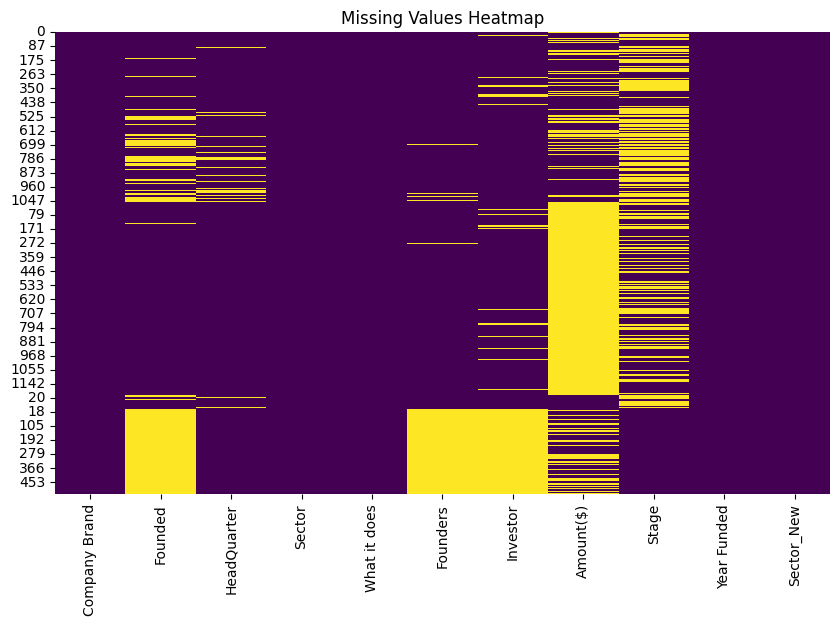

In [1770]:
# Check for missing values
print(data_final.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_final.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values (e.g., drop columns, impute values)
# df.dropna(inplace=True)  # Drop rows with missing values
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # Impute missing values


In [1771]:
data_final["Amount($)"]

0      200000
1      100000
2         NaN
3      400000
4      340000
        ...  
521   3287250
522       NaN
523       110
524    511350
525    511350
Name: Amount($), Length: 2857, dtype: object

In [1772]:
print(data_final['Amount($)'].isnull().sum())

1591


Handling missing values

In [1773]:
data_final['Amount($)'].describe()

count       1266
unique       508
top      1000000
freq          53
Name: Amount($), dtype: float64

In [1774]:
data_final

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN,2020,Technology
...,...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaN,Bangalore,b2b,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,3287250,Series C,2018,Commerce
522,Happyeasygo Group,NaN,Haryana,tourism,HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018,Lifestyle
523,Mombay,NaN,Mumbai,food and beverage,Mombay is a unique opportunity for housewives ...,NaN,NaN,110,Seed,2018,Food & Beverages
524,Droni Tech,NaN,Mumbai,information technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511350,Seed,2018,Technology


A skewness value of 4.3274 indicates that the distribution is highly positively skewed. Positive skewness means that the right tail of the distribution is longer or fatter than the left tail, and the majority of the data points are concentrated on the left side. This practically means that  there are extreme values or outliers on the right side of the distribution, pulling the mean and the tail in that direction. Filling null values with the median is the best option in this case.

In [1775]:
print(data_final['Amount($)'].isnull().sum())

1591


In [1776]:
data_final["Amount($)"]

0      200000
1      100000
2         NaN
3      400000
4      340000
        ...  
521   3287250
522       NaN
523       110
524    511350
525    511350
Name: Amount($), Length: 2857, dtype: object

In [1777]:
# Step 1: Remove non-digit characters (except for the dot)
data_final['Amount($)'] = data_final['Amount($)'].replace('[^\d.]', '', regex=True)

# Step 2: Replace the string 'nan' with actual NaN values
data_final['Amount($)'] = data_final['Amount($)'].replace('nan', np.nan)

# Step 3: Replace the string 'undisclosed' with actual NaN values
data_final['Amount($)'] = data_final['Amount($)'].replace('undisclosed', np.nan)

# Step 4: Convert the 'Amount($)' column to numeric
data_final['Amount($)'] = pd.to_numeric(data_final['Amount($)'], errors='coerce')
data_final

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN,2020,Technology
...,...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaN,Bangalore,b2b,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,3287250,Series C,2018,Commerce
522,Happyeasygo Group,NaN,Haryana,tourism,HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018,Lifestyle
523,Mombay,NaN,Mumbai,food and beverage,Mombay is a unique opportunity for housewives ...,NaN,NaN,110,Seed,2018,Food & Beverages
524,Droni Tech,NaN,Mumbai,information technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511350,Seed,2018,Technology


In [1778]:
median_amount = data_final['Amount($)'].median()

print("Median Amount:", median_amount)


Median Amount: 1512135.0


In [1779]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the data
imputer.fit(data_final[['Amount($)']])

# Transform and replace missing values with the median
data_final['Amount($)'] = imputer.transform(data_final[['Amount($)']])


In [1780]:
data_final.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,2019,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,NaN,2020,Technology
1,Krayonnz,2019,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Seed,2020,Education
2,PadCare Labs,2018,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,1512135,Seed,2020,Health
3,NCOME,2020,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,NaN,2020,Telecommunication
4,Gramophone,2016,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,NaN,2020,Technology


Mode imputation is a simple method that doesn't introduce much complexity to the data and imputing missing values with the mode won't significantly impact the analysis. It will also ensure that the imputed values align with the overall distribution of the sector column.

In [1781]:
# dealing with missing values in 'HeadQuarter' column

data_final['HeadQuarter'].fillna("Not Specified", inplace=True)

In [1782]:
# Calculate the mode of the 'Sector' column
mode_sector = data_final['Sector'].mode()[0]

# Fill missing values with the mode
data_final['Sector'].fillna(mode_sector, inplace=True)


In [1783]:
# Calculate the mode of the 'Stage' column
mode_stage = data_final['Stage'].mode()[0]

# Fill missing values with the mode
data_final['Stage'].fillna(mode_stage, inplace=True)

In [1784]:
# check for number of missing values

data_final.isnull().sum()

Company Brand      0
Founded          769
HeadQuarter        0
Sector             0
What it does       0
                ... 
Investor         625
Amount($)          0
Stage              0
Year Funded        0
Sector_New         0
Length: 11, dtype: int64

Founded, Investor and Founders columns are dropped because they are not relevant for the analysis

In [1785]:
#drop Founded column
data_final = data_final.drop(columns='Founded')

In [1786]:
#drop Founders column

data_final = data_final.drop(columns='Founders')

In [1787]:
#drop Investor column

data_final = data_final.drop(columns='Investor')

In [1788]:
#get data shape
data_final.shape

(2857, 8)

In [1789]:
data_final['Stage'].describe()

count     2857
unique      30
top       Seed
freq      1838
Name: Stage, dtype: object

In [1790]:
data_final.head(50)

,Company Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year Funded,Sector_New
0,Aqgromalin,Chennai,agritech,Cultivating Ideas for Profit,200000,Seed,2020,Technology
1,Krayonnz,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,100000,Seed,2020,Education
2,PadCare Labs,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,1512135,Seed,2020,Health
3,NCOME,New Delhi,escrow,Escrow-as-a-service platform,400000,Seed,2020,Telecommunication
4,Gramophone,Indore,agritech,Gramophone is an AgTech platform enabling acce...,340000,Seed,2020,Technology
...,...,...,...,...,...,...,...,...
45,Ayana,Bangalore,renewable player,Ayana Renewable Power is an Indian renewable e...,390000000,Seed,2020,Energy
46,Fisdom,Bangalore,fintech,Fisdom is a fintech company that offers invest...,7000000,Seed,2020,Finance
47,Tinker Coders,Noida,edtech,Tinker Coder is a LIVE Online Platform through...,1512135,Seed,2020,Education
48,Infinite Uptime,Pune,iot startup,The industrial Internet platform that harnesse...,5100000,Series B,2020,Technology


In [1791]:
data_final['Amount($)'].describe()

count          2857
mean       33996510
std      1311831426
min             110
25%         1512135
50%         1512135
75%         1512135
max     70000000000
Name: Amount($), dtype: float64

In [1792]:
data_final.to_csv('data_final2.csv', index=False)

# Answering Business Questions
1. What top 10 sectors have received the highest amount of funding

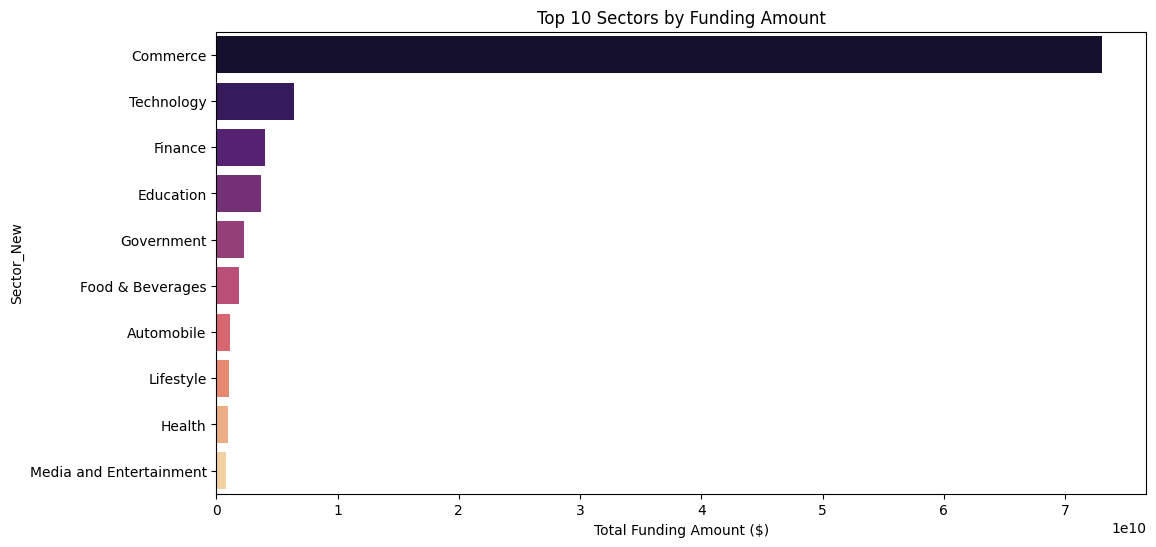

In [1661]:
#plot a bar chart showing the top 10 sectors with highest amount of funding

top_sectors = data_final.groupby('Sector_New')['Amount($)'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='magma')
plt.title('Top 10 Sectors by Funding Amount')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector_New')
plt.show()

This plot highlights the Top 10 sectors which received the most amounts of funding. We can confidently say that these sectors had the most attractive opportunities for both investors and founders with Technology being on top of the list



2.  Which sectors have received lowest amounts of funding

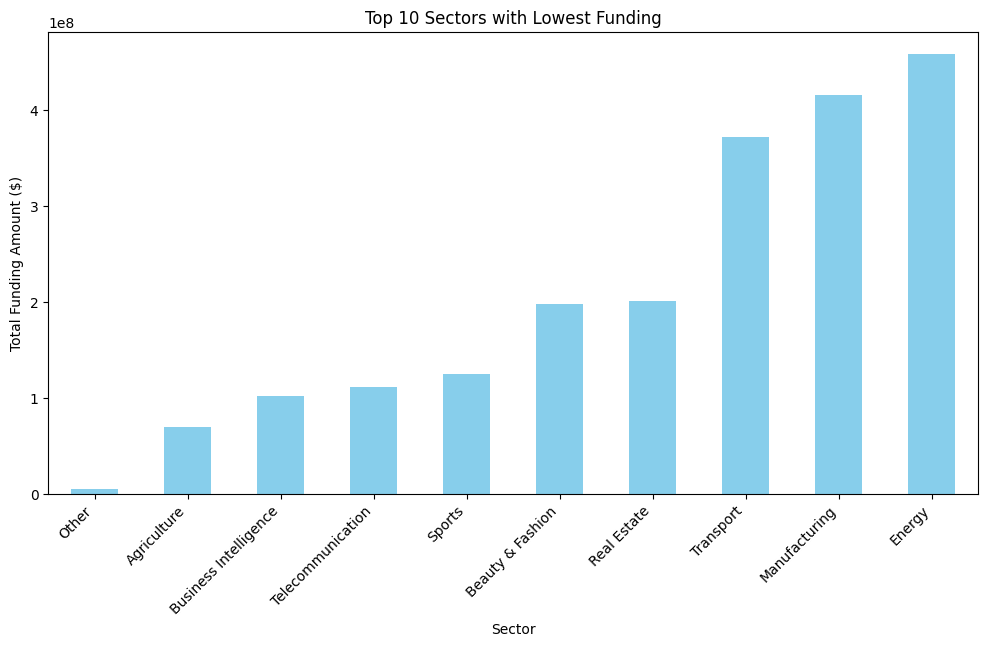

In [1655]:
# Group by sector and calculate the total funding for each sector
sector_funding = data_final.groupby('Sector_New')['Amount($)'].sum()

# Sort sectors by total funding in ascending order and select the top 10
top_10_lowest_sectors = sector_funding.sort_values().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_lowest_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sectors with Lowest Funding')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.show()



From the above plot, it is evident that these sectors received the lowest amount of funding and are therefore not advisable opportunities for both investors and startup founders.





3. What is the average amount of funding a startup can receive in the Indian ecosystem




In [1656]:
# Calculate the average funding amount
average_funding = data_final['Amount($)'].mean()
median_funding = data_final['Amount($)'].median()
average_funding

33996510.393028885

The average funding amount for startups in the Indian ecosystem is approximately 34 million dollars. However, this figure may not perfectly represent the typical funding scenario due to the presence of outliers, causing the data to be skewed. While the mean provides a general idea, it's crucial to recognize the potential influence of exceptionally high or low funding amounts on this average. Further analysis is required for a more robust understanding of the funding landscape.

4. Which funding stages tend to receive the highest amount of funding

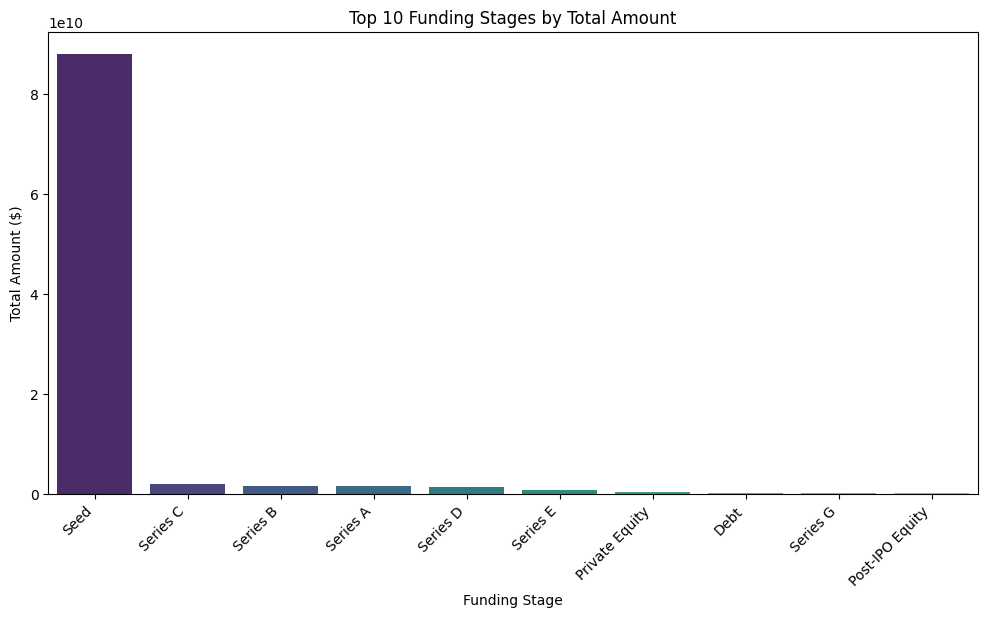

In [1657]:
# Group by Stage and calculate the sum of Amount
total_amount_by_stage = data_final.groupby('Stage')['Amount($)'].sum().sort_values(ascending=False)

# Select top 10 funding stages
top_10_stages = total_amount_by_stage.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stages.index, y=top_10_stages.values, palette='viridis')
plt.title('Top 10 Funding Stages by Total Amount')
plt.xlabel('Funding Stage')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()

It is obvious from the above plot that the 'Seed' stage received the most amount of funding. Understanding which stages attract more funding can provide insights into the competitive landscape and aid our decision as startups

5. Which location of HeadQuarters in India have the highest concentration of highly funded startups

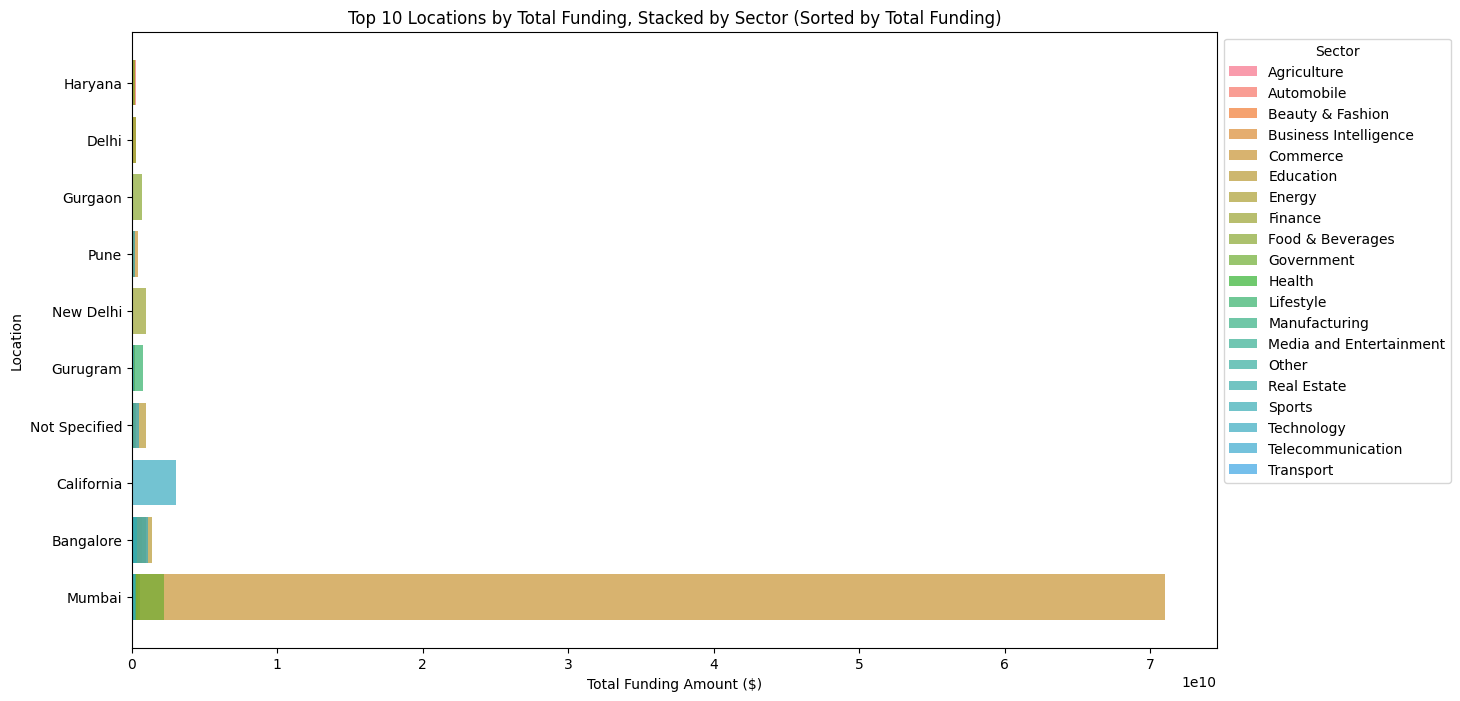

In [1693]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'HeadQuarter' and 'Sector_New', calculate the total funding for each location and sector combination
location_sector_total_funding = data_final.groupby(['HeadQuarter', 'Sector_New'])['Amount($)'].sum().reset_index()

# Select the top N locations, for example, the top 10
top_locations = location_total_funding.head(10)

# Filter the data for the top N locations
top_location_data = location_sector_total_funding[location_sector_total_funding['HeadQuarter'].isin(top_locations.index)]

# Pivot the data for a stacked bar chart
pivot_table = top_location_data.pivot_table(values='Amount($)', index='HeadQuarter', columns='Sector_New', aggfunc='sum', fill_value=0)

# Calculate total funding for each location
total_funding_per_location = pivot_table.sum(axis=1)

# Sort locations based on total funding (descending order)
sorted_locations = total_funding_per_location.sort_values(ascending=False).index
pivot_table = pivot_table.loc[sorted_locations]

# Plot the horizontal stacked bar chart
plt.figure(figsize=(14, 8))

# Loop through each sector and plot a horizontal stacked bar
for sector in pivot_table.columns:
    plt.barh(pivot_table.index, pivot_table[sector], label=sector, alpha=0.7)

# Customize the plot
plt.title('Top 10 Locations by Total Funding, Stacked by Sector (Sorted by Total Funding)')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Location')
plt.legend(title='Sector', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()


The visual indicates that Mumbai is the location with the highest concentration of highly funded startups. Within Mumbai, the Commerce sector emerges as the dominant contributor to the overall funding, highlighting its significance in driving the region's startup ecosystem. This suggests that Mumbai, particularly in the Commerce sector, has attracted substantial investment, making it a focal point for venture capital and a hub for high-value startups in India."

6. What is the overall trend in funding for Indian startups between 2018 and 2021

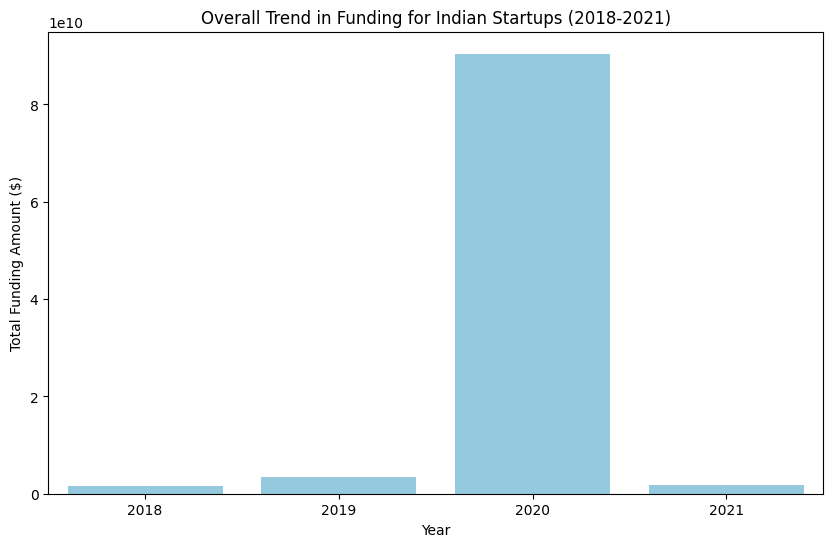

In [1682]:
# Calculate total funding per year
total_funding_per_year = data_final.groupby('Year Funded')['Amount($)'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Year Funded', y='Amount($)', data=total_funding_per_year, color='skyblue')
plt.title('Overall Trend in Funding for Indian Startups (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.show()


In 2020, there was a significant spike in funding amount, more than 40 times compared to the other years.
This exceptional increase could be attributed to various factors such as:
1. Global economic conditions: The funding landscape might have been influenced by global economic trends.
2. Industry-specific growth: Certain sectors or industries may have experienced rapid expansion or increased investor interest.
3. Pandemic-related effects: The COVID-19 pandemic might have shaped investment strategies, with a focus on specific areas.

Further investigation and analysis are recommended to better understand the dynamics behind this notable increase.


7. Are there specific sectors that attract funding at particular stages?


<Figure size 1200x800 with 0 Axes>

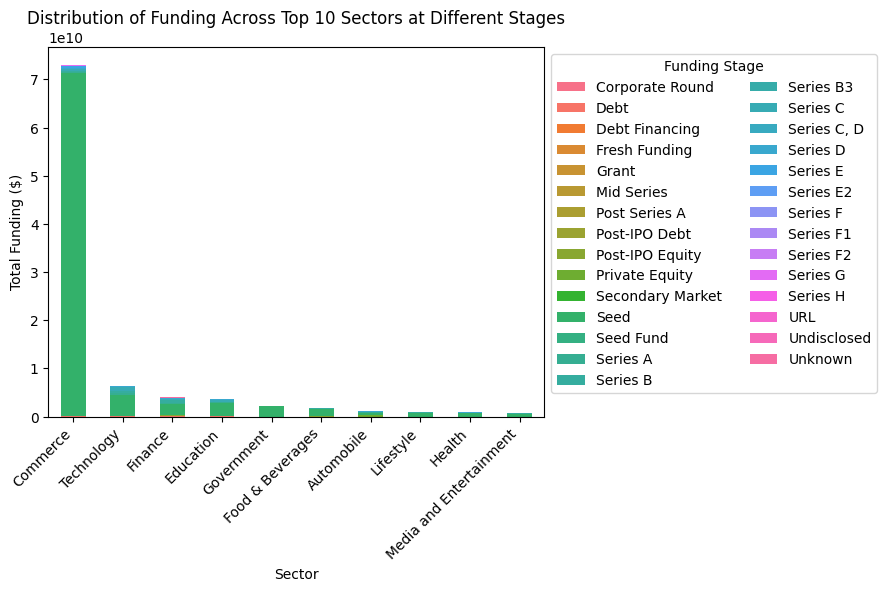

In [1676]:
# Step 1: Filter out rows with missing values in 'Sector_New' or 'Stage' columns
data_final_filtered = data_final.dropna(subset=['Sector_New', 'Stage'])

# Step 2: Get the top 10 sectors based on total funding
top_10_sectors = data_final_filtered.groupby('Sector_New')['Amount($)'].sum().nlargest(10).index

# Step 3: Filter the DataFrame for the top 10 sectors
data_final_top_10_sectors = data_final_filtered[data_final_filtered['Sector_New'].isin(top_10_sectors)]

# Step 4: Sort sectors based on total funding across all stages
sorted_sectors = data_final_top_10_sectors.groupby('Sector_New')['Amount($)'].sum().nlargest(len(top_10_sectors)).index

# Step 5: Create a pivot table to summarize the total funding for each sector at each stage
pivot_table = data_final_top_10_sectors.pivot_table(values='Amount($)', index='Sector_New', columns='Stage', aggfunc='sum', fill_value=0)

# Step 6: Reorder the pivot table based on the sorted sectors
pivot_table = pivot_table.loc[sorted_sectors]

# Step 7: Plot the stacked bar chart with distinct colors for each stage
plt.figure(figsize=(12, 8))
sns.set_palette("husl", n_colors=len(pivot_table.columns))  # Use distinct colors for each stage
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Funding Across Top 10 Sectors at Different Stages')
plt.xlabel('Sector')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=45, ha='right')

# Step 8: Add legend with 2 columns
legend = plt.legend(title='Funding Stage', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)

# Step 9: Show the plot
plt.show()


Commerce is the most funded sector, with a notable emphasis on seed-stage investment. This indicates a strong appetite for supporting early-stage innovations in commerce. The chart suggests a trend of investors recognizing and backing promising ventures in the early stages of commerce-related startups.